In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import re

In [3]:
df = pd.read_csv('../data/twitter_training.csv')
df = pd.DataFrame(df.values, columns = ['id', 'game', 'target', 'text'])
df = df.dropna()
df

,id,game,target,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
(set(df['game'].values))
print(f'Game column has {len(set(df["game"].values))} unique categories')
print('Targets have these values:\n', set(df["target"].values))

Game column has 32 unique categories
Targets have these values:
 {'Negative', 'Positive', 'Neutral', 'Irrelevant'}


In [5]:
df.groupby('target').count()

,id,game,text
target,,,
Irrelevant,12875,12875,12875
Negative,22358,22358,22358
Neutral,18108,18108,18108
Positive,20654,20654,20654


Targets are slightly unbalanced

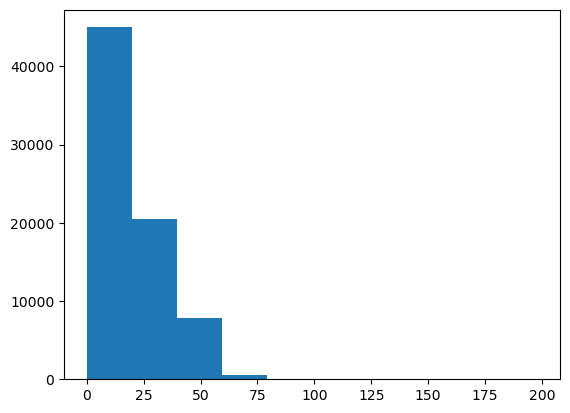

In [6]:
lens = []
for i in df['text'].values:
    lens.append(len(i.split()))
    
plt.hist(lens)
plt.show()

In [7]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


In [8]:
df = df.drop('id', axis = 1)
lbl = LabelEncoder()
df['game'] = lbl.fit_transform(df['game'])

In [9]:
mapa = {'Positive':3,
        'Neutral': 2,
        'Negative': 1,
        'Irrelevant': 0}
rev = {}
for i in mapa.keys():
    rev[mapa.get(i)] = i

df['target'] = df['target'].apply(lambda x: mapa[x])
y = df['target']
x = df.drop('target', axis=1)
x

,game,text
0,4,I am coming to the borders and I will kill you...
1,4,im getting on borderlands and i will kill you ...
2,4,im coming on borderlands and i will murder you...
3,4,im getting on borderlands 2 and i will murder ...
4,4,im getting into borderlands and i can murder y...
...,...,...
74676,21,Just realized that the Windows partition of my...
74677,21,Just realized that my Mac window partition is ...
74678,21,Just realized the windows partition of my Mac ...
74679,21,Just realized between the windows partition of...


In [10]:
y = df['target']
x = df.drop('target', axis=1)

def text_prep(text):
    text = text.lower()
    return re.sub(r'[^\w\s]', '', text)

x['text'] = x['text'].apply(text_prep)
x

,game,text
0,4,i am coming to the borders and i will kill you...
1,4,im getting on borderlands and i will kill you all
2,4,im coming on borderlands and i will murder you...
3,4,im getting on borderlands 2 and i will murder ...
4,4,im getting into borderlands and i can murder y...
...,...,...
74676,21,just realized that the windows partition of my...
74677,21,just realized that my mac window partition is ...
74678,21,just realized the windows partition of my mac ...
74679,21,just realized between the windows partition of...


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [12]:
vocab_size = 500
embedding_dim = 16
max_length = 70
num_classes = len(np.unique(y))
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train['text'])
word_index = tokenizer.word_index

In [13]:
word_index

{'<OOV>': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'of': 7,
 'is': 8,
 'for': 9,
 'in': 10,
 'this': 11,
 'it': 12,
 'you': 13,
 'on': 14,
 'my': 15,
 'that': 16,
 'with': 17,
 'game': 18,
 'so': 19,
 'me': 20,
 'just': 21,
 'have': 22,
 'not': 23,
 'but': 24,
 'be': 25,
 'are': 26,
 'all': 27,
 'was': 28,
 'at': 29,
 'its': 30,
 'im': 31,
 'like': 32,
 'out': 33,
 'from': 34,
 'your': 35,
 '2': 36,
 'now': 37,
 'get': 38,
 'as': 39,
 'we': 40,
 'they': 41,
 'has': 42,
 'if': 43,
 'one': 44,
 'do': 45,
 'good': 46,
 'about': 47,
 'can': 48,
 'play': 49,
 'will': 50,
 'no': 51,
 'an': 52,
 'love': 53,
 'new': 54,
 'up': 55,
 'when': 56,
 'really': 57,
 'what': 58,
 'more': 59,
 'by': 60,
 'time': 61,
 'some': 62,
 'or': 63,
 'how': 64,
 'people': 65,
 'johnson': 66,
 'why': 67,
 'shit': 68,
 'see': 69,
 'dont': 70,
 'cant': 71,
 'been': 72,
 '3': 73,
 'best': 74,
 'still': 75,
 'got': 76,
 'games': 77,
 'even': 78,
 'playing': 79,
 'great': 80,
 'because': 81,
 'who': 82,
 

In [14]:
y_train = tf.keras.utils.to_categorical(y_train.values, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test.values, num_classes=num_classes)

In [15]:
sequences = tokenizer.texts_to_sequences(X_train['text'])
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(X_test['text'])
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

## Modelling

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [18]:
model.compile(loss="categorical_crossentropy", optimizer= "adam",
              metrics=['accuracy'])

In [19]:
num_epochs = 50
history = model.fit(padded,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(testing_padded, y_test))

Epoch 1/50
1850/1850 [==============================] - 52s 27ms/step - loss: 1.1709 - accuracy: 0.4899 - val_loss: 1.0819 - val_accuracy: 0.5463
Epoch 2/50
1850/1850 [==============================] - 48s 26ms/step - loss: 1.0486 - accuracy: 0.5574 - val_loss: 1.0387 - val_accuracy: 0.5589
Epoch 3/50
1850/1850 [==============================] - 48s 26ms/step - loss: 1.0139 - accuracy: 0.5693 - val_loss: 1.0271 - val_accuracy: 0.5664
Epoch 4/50
1850/1850 [==============================] - 48s 26ms/step - loss: 0.9904 - accuracy: 0.5772 - val_loss: 1.0082 - val_accuracy: 0.5683
Epoch 5/50
1850/1850 [==============================] - 48s 26ms/step - loss: 0.9721 - accuracy: 0.5857 - val_loss: 0.9991 - val_accuracy: 0.5671
Epoch 6/50
1850/1850 [==============================] - 50s 27ms/step - loss: 0.9570 - accuracy: 0.5901 - val_loss: 0.9945 - val_accuracy: 0.5740
Epoch 7/50
1850/1850 [==============================] - 48s 26ms/step - loss: 0.9419 - accuracy: 0.5964 - val_loss: 0.9782 -

In [ ]:
model.evaluate(testing_padded, y_test)

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')